In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.6 MB/s eta 0:00:00


In [3]:
df = pd.read_excel("ECOMM DATA.xlsx")
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium


In [ ]:
df["Country"]

,Country
0,United States
1,Australia
2,Australia
3,Germany
4,Senegal
...,...
51285,Japan
51286,United States
51287,United States
51288,Brazil


In [ ]:
#Postal Code contains null values.
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

## SALES BY COUNTRY

In [4]:
g = df.groupby('Country')['Sales']

In [5]:
g.sum()

,Sales
Country,
Afghanistan,21673.32000
Albania,3888.12000
Algeria,36091.59000
Angola,25554.00000
Argentina,57511.78328
...,...
Venezuela,26587.82956
Vietnam,65800.19940
Yemen,2465.71200


In [6]:
total_sale_to_a_particular_country = g.sum()

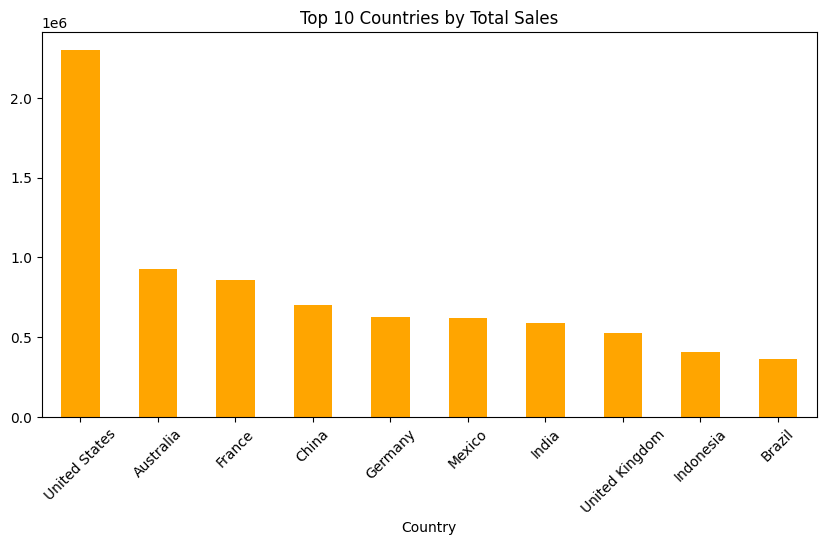

In [7]:
top_countries = total_sale_to_a_particular_country.sort_values(ascending=False).head(10)  # Top 10 countries by sales
top_countries.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title('Top 10 Countries by Total Sales')
plt.xticks(rotation=45)
plt.show()


In [ ]:
location = df[[ 'City', 'State','Country','Postal Code']]

In [ ]:
df.drop(labels=["Row ID",'State', 'Country','Postal Code'],axis= 1,inplace = True)

## BEST SELLING ITEMS

# since there is no unique "product id" for "order id" or vice-versa.TO know best selling product we can only really to the "product name" because it is repeating same times as "order id"

In [ ]:
df[df["Product ID"] == "TEC-PH-10004583"][["Order ID","Product Name"]]

,Order ID,Product Name
3,ES-2013-1579342,"Motorola Smart Phone, Cordless"
43,ES-2012-5877219,"Motorola Smart Phone, Cordless"
17561,IT-2014-5100651,"Motorola Smart Phone, Cordless"
41211,ES-2012-3778678,"Motorola Smart Phone, Cordless"


In [ ]:
df[df["Order ID"] == "CA-2012-124891"][["Product ID","Product Name","Quantity"]]

,Product ID,Product Name,Quantity
0,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,7
331,FUR-TA-10002903,"Bevis Round Bullnose 29"" High Table Top",7
26575,OFF-PA-10004621,Xerox 212,3


In [ ]:
Best_selling_products_list = df["Product Name"].value_counts()
Best_selling_products_list



,count
Product Name,
Staples,227
"Cardinal Index Tab, Clear",92
"Eldon File Cart, Single Width",90
"Rogers File Cart, Single Width",84
"Ibico Index Tab, Clear",83
...,...
"Chromcraft Training Table, Adjustable Height",1
Xerox 1969,1
Acco Glide Clips,1


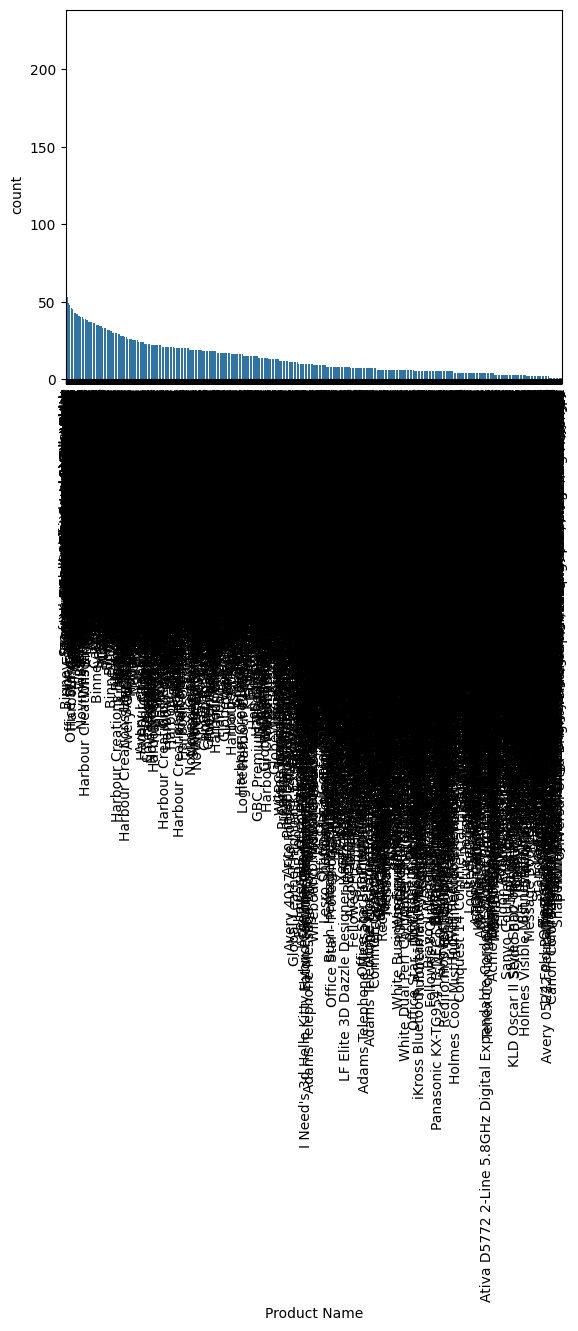

In [ ]:
sns.barplot(x=Best_selling_products_list.index,y=Best_selling_products_list)
plt.xticks(rotation=90)
plt.show()

## FINDING PRODUCTS GENERATING GOOD PROFIT

In [ ]:
product_name_id_profit_sum = []

for product_id in df["Product ID"].unique():
    total_profit = df[df["Product ID"] == product_id]["Profit"].sum()
    Product_Name = df[df["Product ID"] == product_id]["Product Name"].iloc[0]
    product_name_id_profit_sum.append((product_id, total_profit,Product_Name))

#product_name_id_profit_sum


In [ ]:
df1 = pd.DataFrame(product_name_id_profit_sum, columns=['product ID', 'profit',"Product_Name"])

In [ ]:
df1.head(4)

,product ID,profit,Product_Name
0,TEC-AC-10003033,3085.0325,Plantronics CS510 - Over-the-Head monaural Wir...
1,FUR-CH-10003950,-981.0675,"Novimex Executive Leather Armchair, Black"
2,TEC-PH-10004664,5455.9482,"Nokia Smart Phone, with Caller ID"
3,TEC-PH-10004583,-270.4350,"Motorola Smart Phone, Cordless"


DATA FRAME "DF1" SHOWS THE PRODUCT NAME WITH PRODUCT ID IN SORTED MANNER WHERE WE CAN EASILY VISUALIZE PRODUCTS WHICH ARE GENERATING GOOD PROFIT.

In [ ]:
df1 = df1.sort_values(by="profit", ascending=False,ignore_index=True)
df1

,product ID,profit,Product_Name
0,TEC-CO-10004722,25199.9280,Canon imageCLASS 2200 Advanced Copier
1,OFF-AP-10004512,10345.5840,"Hoover Stove, Red"
2,TEC-PH-10004823,8121.4800,"Nokia Smart Phone, Full Size"
3,OFF-BI-10003527,7753.0390,Fellowes PB500 Electric Punch Plastic Comb Bin...
4,TEC-CO-10001449,6983.8836,Hewlett Packard LaserJet 3310 Copier
...,...,...,...
10287,TEC-MOT-10003050,-3998.6820,"Motorola Smart Phone, Cordless"
10288,TEC-PH-10002991,-4574.6439,"Apple Smart Phone, Full Size"
10289,TEC-MA-10000822,-4589.9730,Lexmark MX611dhe Monochrome Laser Printer
10290,OFF-AP-10001623,-4958.1630,"Hoover Stove, White"


In [ ]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


# MONTHLY SALE

In [ ]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

In [ ]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,Market,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,YearMonth
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,APAC,Oceania,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02


In [ ]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

In [ ]:
monthly_sales.head(5)

,YearMonth,Sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610


# TOP 10 CUSTOMERS (WE CAN USE THIS TO GIVE THEM DISCOUNT)

In [ ]:
customer_order_counts = df.groupby("Customer Name")["Order ID"].count().reset_index()

In [ ]:
customer_order_counts.columns = ['Customer Name', 'Order Count']

In [ ]:
customer_order_counts = customer_order_counts.sort_values(by="Order Count", ascending=False,ignore_index=True)

In [ ]:
customer_order_counts.head(10)

,Customer Name,Order Count
0,Muhammed Yedwab,108
1,Steven Ward,106
2,Patrick O'Brill,102
3,Gary Hwang,102
4,Bill Eplett,102
5,Harry Greene,101
6,Eric Murdock,100
7,Art Ferguson,98
8,Brosina Hoffman,97
9,Chloris Kastensmidt,96


In [ ]:
top_20_customer_order_counts = customer_order_counts.head(20)

#   DATA VISUALIZATION

In [ ]:
top_10_df = df1.head(10)

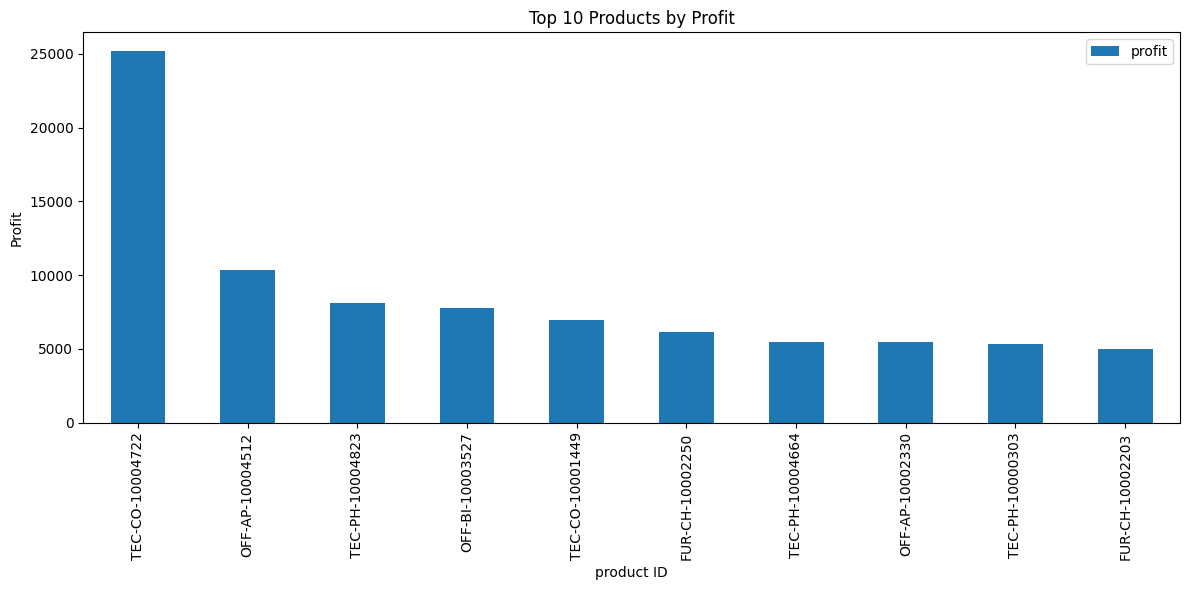

In [ ]:
top_10_df.plot(x='product ID', y='profit', kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Top 10 Products by Profit')
plt.xlabel('product ID')
plt.ylabel('Profit')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

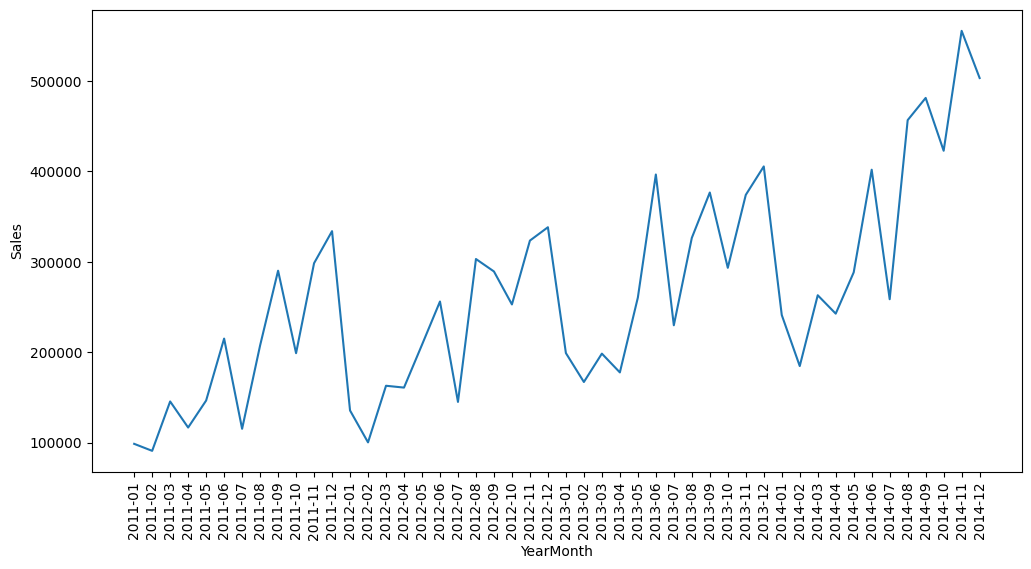

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Sales',data=monthly_sales)
plt.xticks(rotation=90)
plt.show()


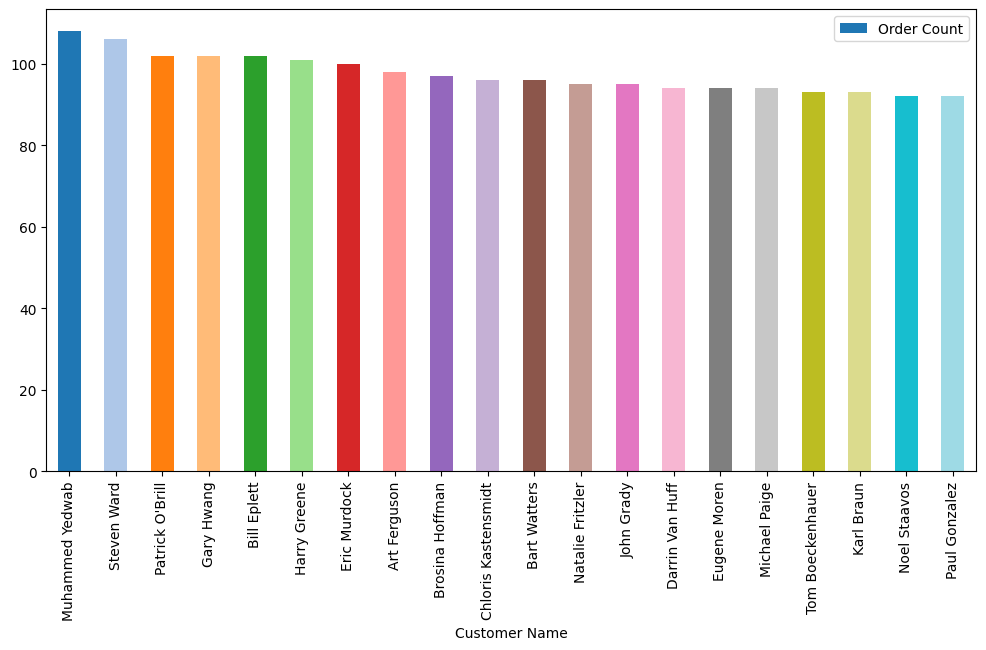

In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
          'gray', 'olive', 'lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'gold', 'darkblue', 'darkgreen', 'darkred']

colors = plt.cm.tab20.colors
top_20_customer_order_counts.head(20).plot(x='Customer Name', y='Order Count', kind='bar',color=colors, figsize=(12, 6))
plt.show()


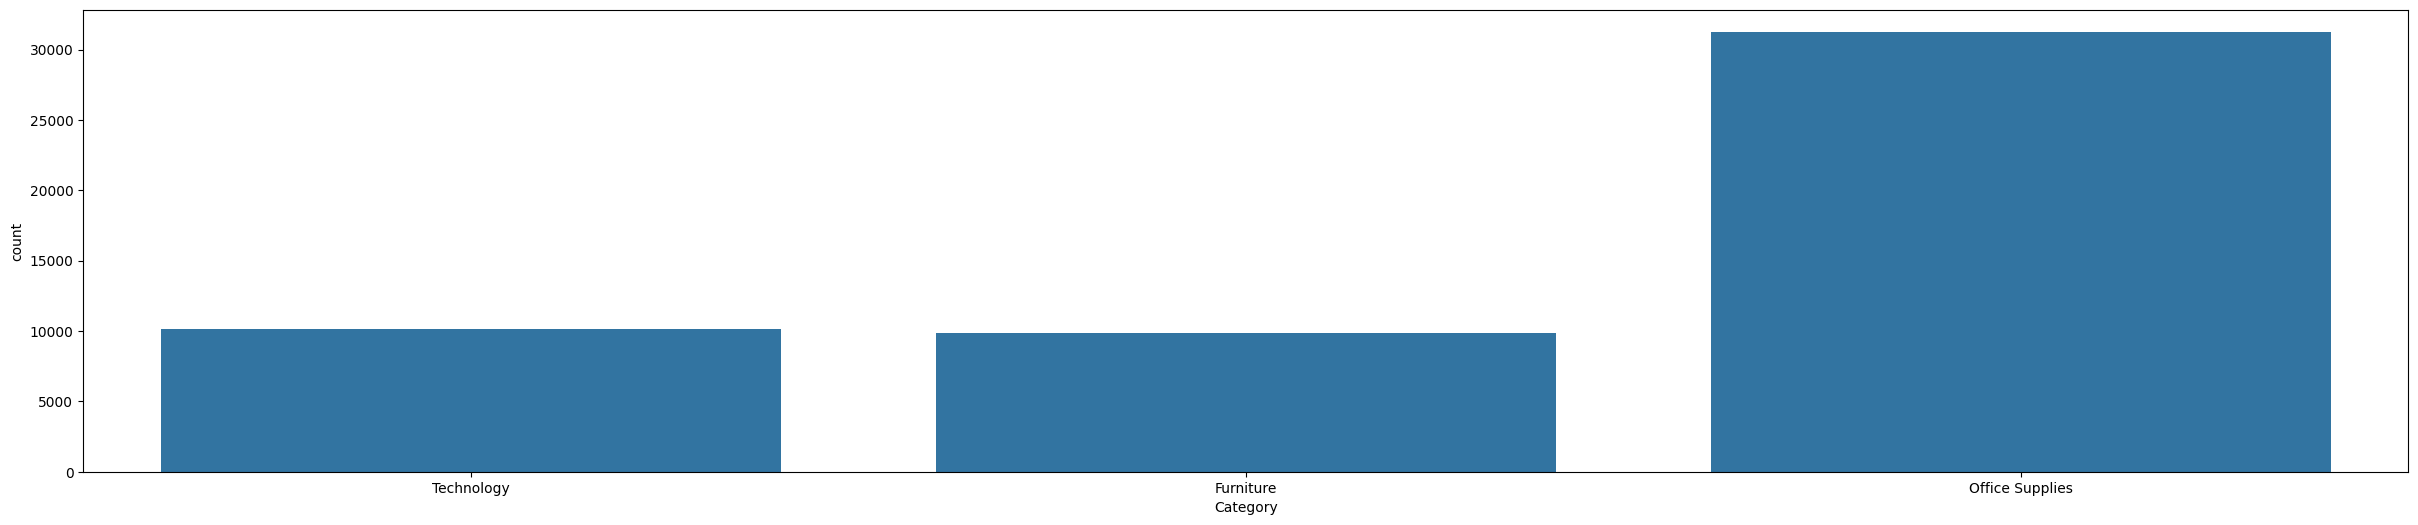

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Category', data=df)
plt.show()


In [ ]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Shipping Cost', 'Order Priority', 'YearMonth'],
      dtype='object')

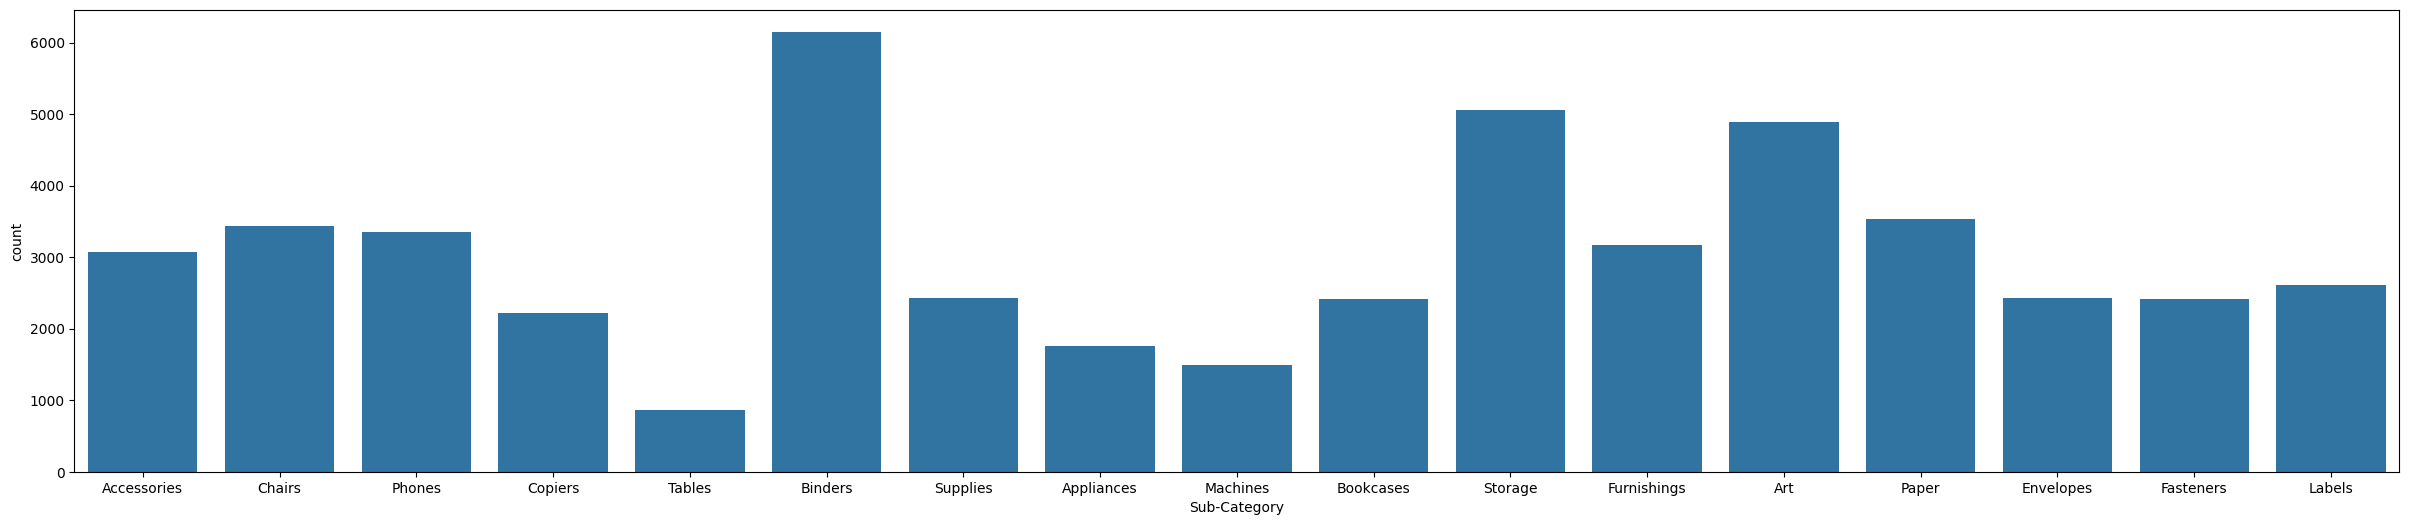

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Sub-Category', data=df)
plt.show()


In [ ]:
df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,Market,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,YearMonth
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,US,East,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012-07
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,APAC,Oceania,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013-02
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,APAC,Oceania,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013-10
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,EU,Central,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013-01
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Africa,Africa,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013-11


In [ ]:
df['Order ID_num'] = df['Order ID'].str.extract('(\d+)') # captures numerical part
df['Order ID_cat'] = df['Order ID'].str[0] # captures the first letter

df['Customer ID_num'] = df['Customer ID'].str.extract('(\d+)') # captures numerical part
df['Customer ID_cat'] = df['Customer ID'].str[0] # captures the first lette

df['Product ID_num'] = df['Product ID'].str.extract('(\d+)') # captures numerical part
df['Product ID_cat'] = df['Product ID'].str[0] # captures the first lette
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,Market,Region,...,Profit,Shipping Cost,Order Priority,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,US,East,...,762.1845,933.57,Critical,2012-07,2012,C,19495,R,10003033,T
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,APAC,Oceania,...,-288.7650,923.63,Critical,2013-02,2013,I,16210,J,10003950,F
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,APAC,Oceania,...,919.9710,915.49,Medium,2013-10,2013,I,12730,C,10004664,T


In [ ]:
df.drop(columns=["Order ID", "Customer ID", "Product ID"], inplace=True)


In [ ]:
df["Product Name"] = df["Product Name"].str.lower()

In [ ]:
df["Product Name"]

,Product Name
0,plantronics cs510 - over-the-head monaural wir...
1,"novimex executive leather armchair, black"
2,"nokia smart phone, with caller id"
3,"motorola smart phone, cordless"
4,"sharp wireless fax, high-speed"
...,...
51285,"advantus thumb tacks, 12 pack"
51286,hoover replacement belt for commercial guardsm...
51287,"#10- 4 1/8"" x 9 1/2"" security-tint envelopes"
51288,"acco index tab, economy"


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation


In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans("","",exclude))

In [ ]:
df["Product Name"] = df["Product Name"].apply(remove_punc1)

In [ ]:
df["Product Name"]

,Product Name
0,plantronics cs510 overthehead monaural wirele...
1,novimex executive leather armchair black
2,nokia smart phone with caller id
3,motorola smart phone cordless
4,sharp wireless fax highspeed
...,...
51285,advantus thumb tacks 12 pack
51286,hoover replacement belt for commercial guardsm...
51287,10 4 18 x 9 12 securitytint envelopes
51288,acco index tab economy


In [ ]:
import re
def remove_dimensions(name):

    name = re.sub(r'\d+([ ]*\d*[\/]?\d*)?[ ]*[\'"]?[ ]*[wdh]?[ ]*x[ ]*\d+([ ]*\d*[\/]?\d*)?[ ]*[\'"]?[ ]*[wdh]?', '', name)


    name = re.sub(r'\s+', ' ', name).strip()
    return name



In [ ]:

df['Product Name'] = df['Product Name'].apply(remove_dimensions)

In [ ]:
df["Product Name"].sample(10)

,Product Name
37180,xerox 1992
13716,rubbermaid clock duo pack
8337,enermax numeric keypad usb
29179,safco industrial wire shelving system
2124,safco classic bookcase mobile
14133,stanley sketch pad fluorescent
2612,global highback leather tilter burgundy
45824,colored envelopes
19778,hon olson stacker stools
27268,sandisk mouse bluetooth


In [ ]:
df.head(3)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,Market,Region,Category,Sub-Category,...,Profit,Shipping Cost,Order Priority,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,US,East,Technology,Accessories,...,762.1845,933.57,Critical,2012-07,2012,C,19495,R,10003033,T
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,APAC,Oceania,Furniture,Chairs,...,-288.7650,923.63,Critical,2013-02,2013,I,16210,J,10003950,F
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,APAC,Oceania,Technology,Phones,...,919.9710,915.49,Medium,2013-10,2013,I,12730,C,10004664,T


In [ ]:
df.head(4)

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,Market,Region,Category,Sub-Category,...,Profit,Shipping Cost,Order Priority,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,US,East,Technology,Accessories,...,762.1845,933.57,Critical,2012-07,2012,C,19495,R,10003033,T
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,APAC,Oceania,Furniture,Chairs,...,-288.7650,923.63,Critical,2013-02,2013,I,16210,J,10003950,F
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,APAC,Oceania,Technology,Phones,...,919.9710,915.49,Medium,2013-10,2013,I,12730,C,10004664,T
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,EU,Central,Technology,Phones,...,-96.5400,910.16,Medium,2013-01,2013,E,16375,K,10004583,T


In [ ]:
df.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,Market,Region,Category,Sub-Category,...,Profit,Shipping Cost,Order Priority,YearMonth,Order ID_num,Order ID_cat,Customer ID_num,Customer ID_cat,Product ID_num,Product ID_cat
0,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,US,East,Technology,Accessories,...,762.1845,933.57,Critical,2012-07,2012,C,19495,R,10003033,T
1,2013-02-05,2013-02-07,Second Class,Justin Ritter,Corporate,Wollongong,APAC,Oceania,Furniture,Chairs,...,-288.7650,923.63,Critical,2013-02,2013,I,16210,J,10003950,F
2,2013-10-17,2013-10-18,First Class,Craig Reiter,Consumer,Brisbane,APAC,Oceania,Technology,Phones,...,919.9710,915.49,Medium,2013-10,2013,I,12730,C,10004664,T
3,2013-01-28,2013-01-30,First Class,Katherine Murray,Home Office,Berlin,EU,Central,Technology,Phones,...,-96.5400,910.16,Medium,2013-01,2013,E,16375,K,10004583,T
4,2013-11-05,2013-11-06,Same Day,Rick Hansen,Consumer,Dakar,Africa,Africa,Technology,Copiers,...,311.5200,903.04,Critical,2013-11,2013,S,9495,R,10000501,T


In [ ]:
df.drop(columns=["Customer Name"], inplace=True)


In [ ]:
X = df.drop(columns=["Sales"])
y = df["Sales"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Define the ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['City','Market','Category','Region','Sub-Category',"Order Priority","Order ID_cat","Customer ID_cat","Product ID_cat"]),
    ('tnf2', TfidfVectorizer(max_features=1000), 'Product Name')  # Ensure 'Product Name' is referenced as a single column
], remainder='passthrough')

# Fit and transform the data using the defined transformer
X_train_trf = transformer.fit_transform(X_train)
X_test_trf = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
X_train_trf

array([[0.0, 0.0, 0.0, ..., '2014', '20560', '10004749'],
       [0.0, 0.0, 0.0, ..., '2014', '17920', '10002885'],
       [0.0, 0.0, 0.0, ..., '2012', '14635', '10001116'],
       ...,
       [0.0, 0.0, 0.0, ..., '2014', '13390', '10000962'],
       [0.0, 0.0, 0.0, ..., '2011', '18250', '10003515'],
       [0.0, 0.0, 0.0, ..., '2013', '19960', '10001661']], dtype=object)